In [1]:
"LIBRARIES"

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy import integrate

In [2]:
"PARAMETERS"

s_0     = 0.2   # Marginal Propensity to Save
I_shock = 1.65  # Shock Real Investment 
A_0     = 1.2   # TFP
α_0     = 0.2   # Output Elasticity of Labor
v_0     = 2     # Sensitivity Labor Supply
K_0     = 10    # Stock of Capital
w_0     = 0.03  # Nominal Wage
dp      = np.arange(0.01,0.06,0.001) # Price Domain
r_0     = dp/w_0# Real Price Domain

In [3]:
"FUNCTIONS"

# PRODUCTION FUNCTION 

def production(α, A, K, N):
    return A*K**(1-α)*N**α

# PRODUCTION FUNCTION IN LABOR TERMS (OR INVERSE FUNCTION)

def inv_production(α, A, K, y):
    return (y/(A*K**(1-α)))**(1/α)

# MARGINAL PRODUCTIVITY OF LABOR

def MgL(α, A, K, N):
    return α*A*K**(1-α)*N**(α-1)

# INVERSE FUNCTION OF MARGINAL PRODUCTIVITY OF LABOR

def inv_MgL(α, A, K, r):
    return (α*A*K**(1-α)*r)**(1/(1-α))

# INVERSE FUNCTION OF DESUTILITY OF LABOR

def inv_UmgL(v, r):
    return v/r

# AGGREGATE DEMAND

def demand(s, I):
    return (1/s)*I

In [4]:
"SCHEDULE"

# DEMAND AND SUPPLY OF LABOR

ld       = inv_MgL(α_0, A_0, K_0, r_0)
ls       = inv_UmgL(v_0, r_0)

# GOODS SUPPLY SCHEDULE (GS)

GS       = production(α_0, A_0, K_0, ld)

# LABOR SUPPLY SCHEDULE (LS)

LS       = production(α_0, A_0, K_0, ls)

# AGREGGATE DEMAND SCHEDULE (DA)

AD_shock = demand(s_0, I_shock)

In [5]:
"EQUILIBRIUM (labor market and goods market)"

def root_labormarket(r):
    
    return inv_MgL(α_0, A_0, K_0, r) - inv_UmgL(v_0, r)
        
sol     = root(root_labormarket, 0.9)
r_eq    = sol.x
N_eq    = inv_MgL(α_0, A_0, K_0, r_eq)  
y_eq    = production(α_0, A_0, K_0, N_eq)
X_eq    = [y_eq, r_eq]
X_eq    = (8.56352352, 1.08062187)

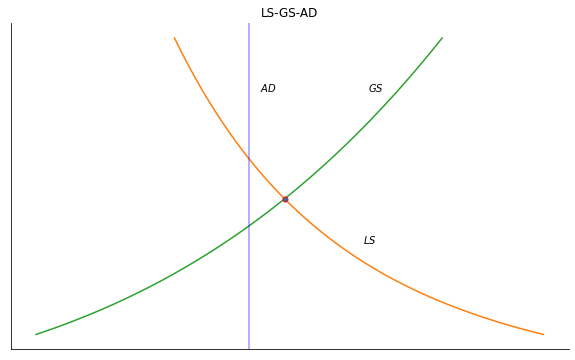

In [6]:
"PLOT"

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(LS, r_0, color = 'C01')
ax.plot(GS, r_0, color = 'C02')
ax.axvline(AD_shock, color = 'Blue', alpha= 0.4)
ax.plot(y_eq, r_eq, marker ='.', markersize= 10, markeredgecolor= 'Red' )
ax.set_title('LS-GS-AD')
ax.text(GS[-15], r_0[-10], '$GS$')
ax.text(LS[12], r_0[15], '$LS$')
ax.text(AD_shock + 0.1, r_0[-10], '$AD$')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

In [7]:
"FLEXPRICE: FIXED POINTS"

def fixed_points_flexprice(α, A, K, I, s, v, θ1, θ2, θ3):
    
    X_f0     = np.zeros(2)
        
    def root_realprice(r):
        
        return θ1*(I - s*production(α, A, K, inv_MgL(α, A, K, r))) - θ3*(production(α, A, K, inv_MgL(α, A, K, r))-production(α, A, K, inv_UmgL(v, r)))
    
    solf0     = root(root_realprice, 0.9)
        
    rf0       = solf0.x      
    
    yf0       = production(α, A, K, inv_MgL(α, A, K, rf0))
    
    X_f0[0] = yf0

    X_f0[1] = rf0
        
    
    return  X_f0  

In [8]:
FP_flex = fixed_points_flexprice(α_0, A_0, K_0, I_shock, s_0, v_0, 1.9, 0.2, 0.02)
FP_flex

array([8.27747324, 0.94331104])

In [9]:
"FLEXPRICE: FIRST DERIVATIVES"

# GS'

def derivative_GS(α, A, K, r): 

    return (1/(1 - α))*((α*A*K**(1 - α))**(1/(1 - α)))*r**((2*α - 1)/(1 - α))


# LS'

def derivative_LS(α, A, K, v, r):

    return -α*A*(K**(1 - α))*(v**α)*(1/r)**(α + 1)

In [10]:
"FLEXPRICE: LOCAL STABILITY"

def stability_flexprice(Xf_bar, α, A, K, I, s, v, θ1, θ2, θ3):
    
    r = Xf_bar[1]
        
    a11 = θ3*derivative_LS(α, A, K, v, r) 
        
    a12 = -θ1*s - θ3
        
    a21 = θ2
        
    a22 = -θ2*(1/derivative_GS(α, A, K, r))
        
    jacobian     = np.array([[a11, a12],
                            [a21, a22]])
        
    trace        = a11 + a22
        
    determinant  = (a11*a22) - (a12*a21) 
        
    discriminant = (a11 + a22)**2 - 4*determinant

                
    print(f"Jacobian matrix \n{jacobian}")
    print(f"Trace \n{trace}")
    print(f"Determinant \n{determinant}")        
    print(f"Discriminant \n{discriminant}")        
    print("Therefore, the system is")
        
    if trace <0 and determinant > 0 and discriminant >0:
        print('Stable Node')
    elif trace <0 and determinant > 0 and discriminant <0:
        print('Stable Focus')

In [11]:
stability_flex = stability_flexprice(FP_flex, α_0, A_0, K_0, I_shock, s_0, v_0, 1.9, 0.2, 0.02)
stability_flex 

Jacobian matrix 
[[-0.0373131  -0.4       ]
 [ 0.2        -0.09116898]]
Trace 
-0.128482085009171
Determinant 
0.08340179747620252
Discriminant 
-0.31709954373650623
Therefore, the system is
Stable Focus


In [12]:
"FLEXPRICE: MODEL"

def model_flexprice(X0, t, α, A, K, I, s, v, θ1, θ2, θ3):
    
    y0, r0 = X0
    
    dy = θ2*(r0 - 1/MgL(α, A, K, inv_production(α, A, K, y0)))
    dr = θ1*(I-s*y0) - θ3*(y0-production(α, A, K, inv_UmgL(v, r0)))

    return np.array([dy, dr])

In [13]:
"FLEXPRICE: MODEL (CONTINUE)"

tmax = 150

time = np.arange(1, tmax, 0.0001)

par  = (α_0, A_0, K_0, I_shock, s_0, v_0, 1.9, 0.2, 0.02)

flex      = integrate.odeint(model_flexprice, X_eq, time, par)

y_d, r_d  = np.round(flex.T, 10) #Round 

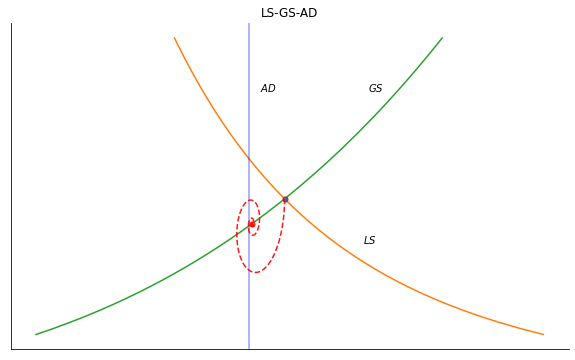

In [14]:
"PLOT"

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(LS, r_0, color = 'C01')
ax.plot(GS, r_0, color = 'C02')
ax.axvline(AD_shock, color = 'Blue', alpha = 0.4)
ax.plot(y_eq, r_eq, marker = '.', markersize = 10, markeredgecolor = 'Red')
ax.plot(FP_flex[0], FP_flex[1], marker = '.', markersize = 10, markeredgecolor = 'Red')
ax.plot(y_d, r_d, 'r--', alpha = 0.9)
ax.set_title('LS-GS-AD')
ax.text(GS[-15], r_0[-10], '$GS$')
ax.text(LS[12], r_0[15], '$LS$')
ax.text(AD_shock + 0.1, r_0[-10], '$AD$')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

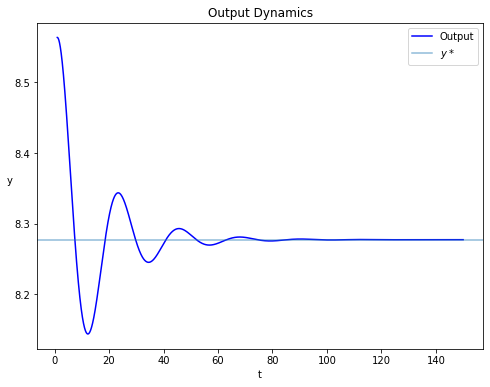

In [15]:
"OUTPUT DYNAMICS"

fig, ax = plt.subplots(figsize = (8,6))
ax.plot(time, y_d, color=  'Blue', label = 'Output')
ax.axhline(FP_flex[0], alpha = 0.5, label = '$y*$')
ax.set_xlabel('t')
ax.set_ylabel('y', rotation = 0)
ax.set_title('Output Dynamics')
ax.legend()
plt.show()

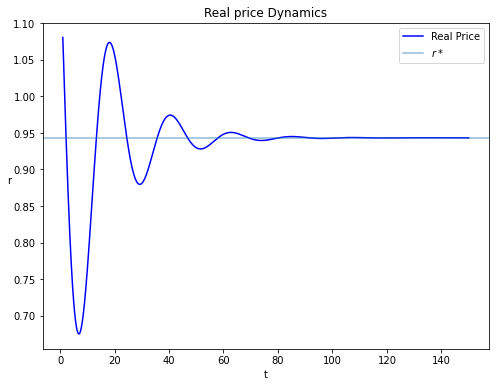

In [16]:
"REAL PRICE DYNAMICS"

fig, ax = plt.subplots(figsize = (8,6))
ax.plot(time, r_d, color=  'Blue', label = 'Real Price')
ax.axhline(FP_flex[1], alpha = 0.5, label = '$r*$')
ax.set_xlabel('t')
ax.set_ylabel('r', rotation = 0)
ax.set_title('Real price Dynamics')
ax.legend()
plt.show()

In [17]:
"FLEXPRICE ALTERNATIVE"

'FLEXPRICE ALTERNATIVE'

In [18]:
"FLEXPRICE: FIXED POINTS (NO CHANGES)"
FP_flex = fixed_points_flexprice(α_0, A_0, K_0, I_shock, s_0, v_0, 1.9, 0.2, 0.02)
FP_flex

array([8.27747324, 0.94331104])

In [19]:
"FLEXPRICE: STABILITY (CHANGES)"


def stability_alternative(Xf_bar, α, A, K, I, s, v, θ1, θ2, θ3):
    
    r = Xf_bar[1]
        
    a11 = θ3*derivative_LS(α, A, K, v, r)*r # multiplied by r
        
    a12 = -θ1*s*r - θ3*r                  # multiplied by r
        
    a21 = θ2
        
    a22 = -θ2*(1/derivative_GS(α, A, K, r))
        
    jacobian     = np.array([[a11, a12],
                            [a21, a22]])
        
    trace        = a11 + a22
        
    determinant  = (a11*a22) - (a12*a21) 
        
    discriminant = (a11 + a22)**2 - 4*determinant

                
    print(f"Jacobian matrix alternative \n{jacobian}")
    print(f"Trace alternative \n{trace}")
    print(f"Determinant alternative \n{determinant}")        
    print(f"Discriminant alternative \n{discriminant}")        
    print("Therefore, the system alternative is")
        
    if trace <0 and determinant > 0 and discriminant >0:
        print('Stable Node')
    elif trace <0 and determinant > 0 and discriminant <0:
        print('Stable Focus')

In [20]:
stability_alt = stability_alternative(FP_flex, α_0, A_0, K_0, I_shock, s_0, v_0, 1.9, 0.2, 0.02)
stability_alt

Jacobian matrix alternative 
[[-0.03519786 -0.37732442]
 [ 0.2        -0.09116898]]
Trace alternative 
-0.1263668440937416
Determinant alternative 
0.07867383618269463
Discriminant alternative 
-0.29872676544456656
Therefore, the system alternative is
Stable Focus


In [22]:
"FLEXPRICE: MODEL (CHANGES)"

def model_alternative(X0, t, α, A, K, I, s, v, θ1, θ2, θ3):
    
    y0, r0 = X0
    
    dy = θ2*(r0 - 1/MgL(α, A, K, inv_production(α, A, K, y0)))
    dr = (θ1*(I-s*y0) - θ3*(y0-production(α, A, K, inv_UmgL(v, r0))))*r0 # multiplied by r

    return np.array([dy, dr])

In [23]:
"FLEXPRICE: MODEL (CHANGES)"

tmax = 150

time = np.arange(1, tmax, 0.0001)

par  = (α_0, A_0, K_0, I_shock, s_0, v_0, 1.9, 0.2, 0.02)

alternative      = integrate.odeint(model_alternative, X_eq, time, par)

y_alternative, r_alternative = np.round(alternative.T, 10) #Round 

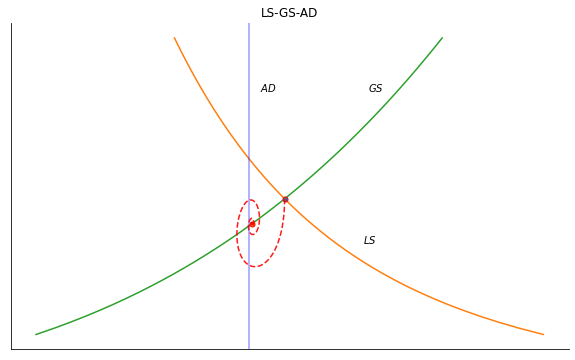

In [24]:
"PLOT"

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(LS, r_0, color = 'C01')
ax.plot(GS, r_0, color = 'C02')
ax.axvline(AD_shock, color = 'Blue', alpha = 0.4)
ax.plot(y_eq, r_eq , marker= '.', markersize = 10, markeredgecolor = 'Red')
ax.plot(FP_flex[0], FP_flex[1], marker = '.', markersize = 10, markeredgecolor = 'Red')
ax.plot(y_alternative, r_alternative, 'r--', alpha = 0.9)
ax.set_title('LS-GS-AD')
ax.text(GS[-15], r_0[-10], '$GS$')
ax.text(LS[12], r_0[15], '$LS$')
ax.text(AD_shock + 0.1, r_0[-10], '$AD$')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

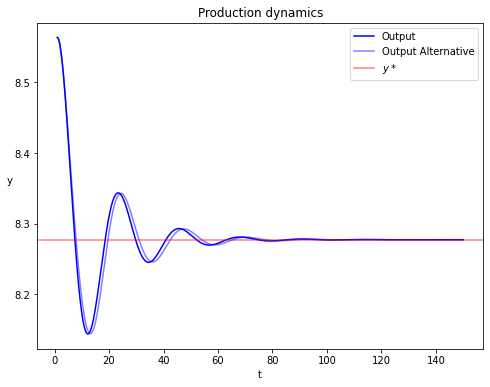

In [25]:
"PRODUCTION DYNAMICS"

fig, ax = plt.subplots(figsize = (8,6))
ax.plot(time, y_d, color= 'Blue', label = 'Output')
ax.plot(time, y_alternative, color = 'Blue', alpha = 0.5, label = 'Output Alternative')
ax.axhline(FP_flex[0], color = 'Red', alpha = 0.5, label = '$y*$')
ax.set_xlabel('t')
ax.set_ylabel('y', rotation = 0)
ax.set_title('Production dynamics')
ax.legend()
plt.show()

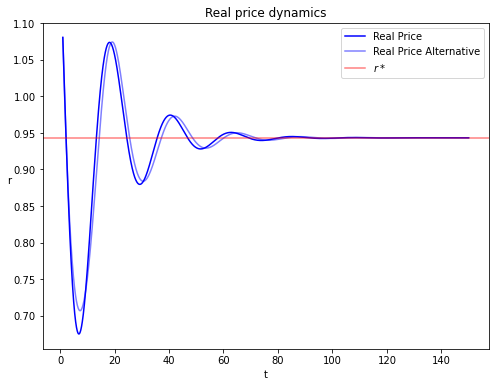

In [26]:
"REAL PRICE DYNAMICS"

fig, ax = plt.subplots(figsize = (8,6))
ax.plot(time, r_d, color= 'Blue', label = 'Real Price')
ax.plot(time, r_alternative, color = 'Blue', alpha = 0.5, label = 'Real Price Alternative')
ax.axhline(FP_flex[1], color = 'Red', alpha = 0.5, label = '$r*$')
ax.set_xlabel('t')
ax.set_ylabel('r', rotation = 0)
ax.set_title('Real price dynamics')
ax.legend()
plt.show()